In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

In [59]:
df = pd.read_csv('citation.csv')
df = df.drop('responsible RA', axis=1).iloc[0:75, :]
df['cumu_number'] = pd.to_numeric(df['cumu_number'], errors='coerce')
df

,year,number,cumu_number,Econ related,Stat related
0,1948.0,1.0,1,0.0,1.0
1,1949.0,0.0,1,0.0,0.0
2,1950.0,1.0,2,0.0,1.0
3,1951.0,1.0,3,0.0,1.0
4,1952.0,0.0,3,0.0,0.0
...,...,...,...,...,...
70,2018.0,40.0,782,15.0,38.0
71,2019.0,36.0,818,14.0,35.0
72,2020.0,39.0,857,21.0,39.0
73,2021.0,43.0,900,18.0,41.0


# Estimating Parameters (C-Bar and r) 
## Finding Slopes

In [60]:
num = df.number
cu_num = df.cumu_number

rate = []
for i in range(len(num)):
    if (i == 0) or (i == 74):
        rate.append(np.nan)
    else:
        rate.append((num[i+1] - num[i-1]) / 2)
        
cu_rate = []
for i in range(len(cu_num)):
    if (i== 0) or (i == 74):
        cu_rate.append(np.nan)
    else:
        cu_rate.append((cu_num[i+1]-cu_num[i-1])/2)

df['rate'] = rate

df['prop_growth_rate'] = np.where(df['number'] == 0, 0, df['rate'] / df['number'])


df['cu_rate']=cu_rate
df['cu_prop_grow_rate'] = df['cu_rate'] / cu_num

df

,year,number,cumu_number,Econ related,Stat related,rate,prop_growth_rate,cu_rate,cu_prop_grow_rate
0,1948.0,1.0,1,0.0,1.0,NaN,NaN,NaN,NaN
1,1949.0,0.0,1,0.0,0.0,0.0,0.000000,0.5,0.500000
2,1950.0,1.0,2,0.0,1.0,0.5,0.500000,1.0,0.500000
3,1951.0,1.0,3,0.0,1.0,-0.5,-0.500000,0.5,0.166667
4,1952.0,0.0,3,0.0,0.0,-0.5,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
70,2018.0,40.0,782,15.0,38.0,1.0,0.025000,38.0,0.048593
71,2019.0,36.0,818,14.0,35.0,-0.5,-0.013889,37.5,0.045844
72,2020.0,39.0,857,21.0,39.0,3.5,0.089744,41.0,0.047841
73,2021.0,43.0,900,18.0,41.0,-0.5,-0.011628,40.5,0.045000


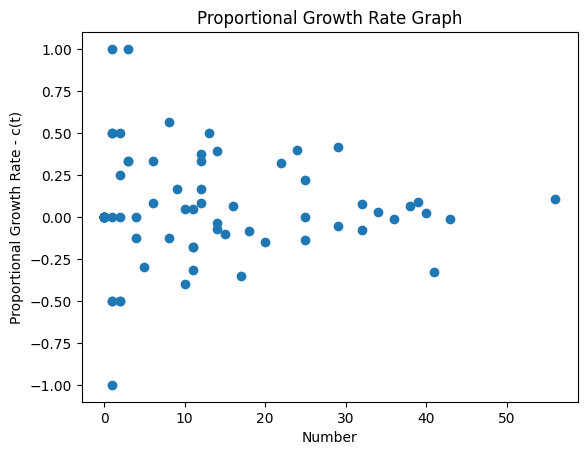

In [61]:
plt.scatter(df.number, df.prop_growth_rate)
plt.title('Proportional Growth Rate Graph')
plt.xlabel('Number')
plt.ylabel('Proportional Growth Rate - c(t)')
plt.show()

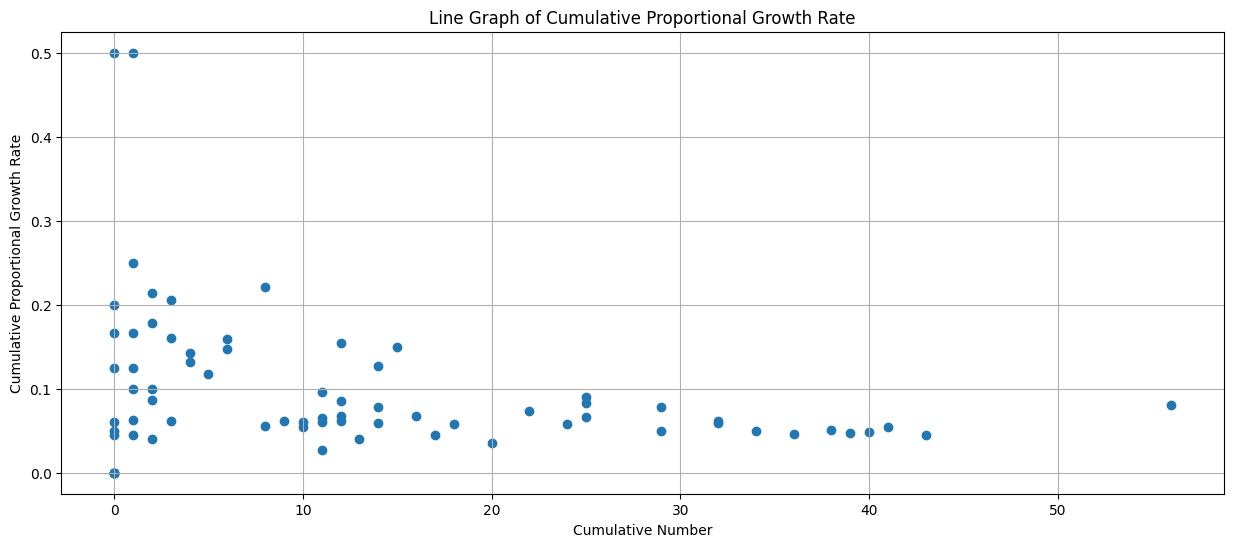

In [62]:
plt.figure(figsize=(15, 6))

plt.scatter(df['number'], df['cu_prop_grow_rate'])


# plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Adding titles and labels
plt.title('Line Graph of Cumulative Proportional Growth Rate')
plt.xlabel('Cumulative Number')
plt.ylabel('Cumulative Proportional Growth Rate')

# Show the plot with a grid for better readability
plt.grid(True)
plt.show()

## Find interval where PGR is linear

In [63]:
df_linear = df[(df.prop_growth_rate > -1) & (df.prop_growth_rate < 1)]

In [64]:
df_cu = df[(df.cu_prop_grow_rate > 0) & (df.cu_prop_grow_rate < 0.5)]

In [65]:
x = sm.add_constant(df_linear.number) 
lm = sm.OLS(df_linear.prop_growth_rate,x).fit()

r = lm.params[0]
c_bar = lm.params[0] / lm.params[1]

intercept, slope = lm.params

print(f'r: {r}')
print(f'c-bar: {c_bar}')
lm.summary()



r: 0.0253070082625463
c-bar: 45.862980286028744


/var/folders/c0/9zn5f8690jd2h7z_c3t7vqxw0000gn/T/ipykernel_42206/2495682582.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = lm.params[0]
/var/folders/c0/9zn5f8690jd2h7z_c3t7vqxw0000gn/T/ipykernel_42206/2495682582.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c_bar = lm.params[0] / lm.params[1]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       prop_growth_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.06055
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.806
Time:                        22:44:24   Log-Likelihood:                -2.3584
No. Observations:                  70   AIC:                             8.717
Df Residuals:                      68   BIC:                             13.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0253      0.042      0.606      0.546      -0.058       0.109
number         0.0006      0.002      0.246      0.806      -0.004       0.005
==============================================================================
Omnibus:                        0.076   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.010
Skew:                           0.014   Prob(JB):                        0.995
Kurtosis:                       2.949   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

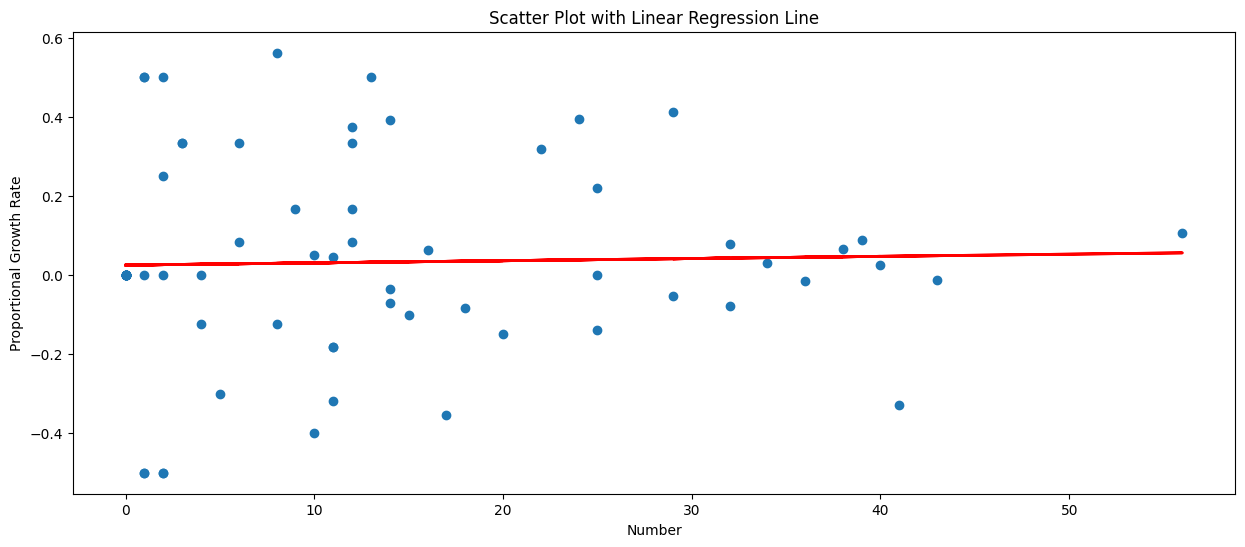

In [66]:
plt.figure(figsize=(15, 6))
plt.scatter(df_linear.number, df_linear['prop_growth_rate'])

# Calculate the values of the regression line
x_values = np.array(df_linear.number)
regression_line = intercept + slope * x_values

# Plot the regression line on the same figure
plt.plot(x_values, regression_line, color='red', linewidth=2)

# Add titles and labels
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Number')
plt.ylabel('Proportional Growth Rate')

# Show the plot
plt.show()

In [67]:
z = sm.add_constant(df_cu.cumu_number)
lm = sm.OLS(df_cu.cu_prop_grow_rate, z).fit()

r_cu = lm.params[0]
c_bar_cu = -lm.params[0]/lm.params[1]

# Retrieve the regression coefficients
intercept, slope = lm.params

print(f'r_cu:{r_cu}')
print(f'c-bar_cu:{c_bar_cu}')
lm.summary()


r_cu:0.11981379724957858
c-bar_cu:1039.5797675042868


/var/folders/c0/9zn5f8690jd2h7z_c3t7vqxw0000gn/T/ipykernel_42206/902983714.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r_cu = lm.params[0]
/var/folders/c0/9zn5f8690jd2h7z_c3t7vqxw0000gn/T/ipykernel_42206/902983714.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c_bar_cu = -lm.params[0]/lm.params[1]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      cu_prop_grow_rate   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     27.65
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.91e-06
Time:                        22:44:24   Log-Likelihood:                 108.58
No. Observations:                  64   AIC:                            -213.2
Df Residuals:                      62   BIC:                            -208.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1198      0.008     15.631      0.000       0.104       0.135
cumu_number    -0.0001   2.19e-05     -5.258      0.000      -0.000   -7.14e-05
==============================================================================
Omnibus:                        5.498   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.742
Skew:                           0.648   Prob(JB):                       0.0934
Kurtosis:                       3.312   Cond. No.                         476.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

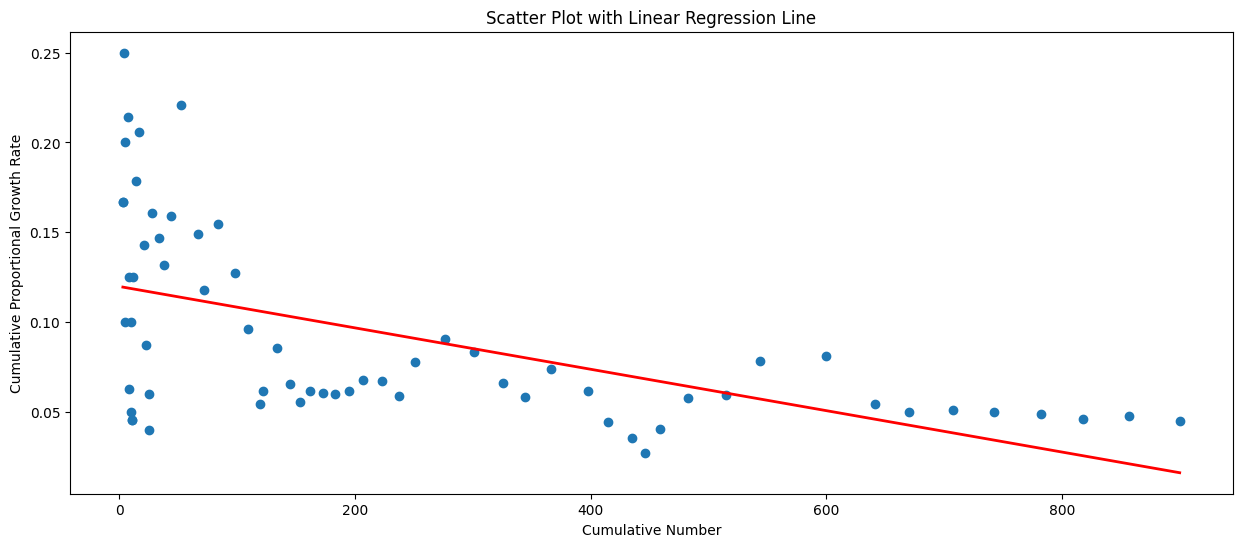

In [68]:
plt.figure(figsize=(15, 6))
plt.scatter(df_cu.cumu_number, df_cu['cu_prop_grow_rate'])

# Calculate the values of the regression line
x_values = np.array(df_cu.cumu_number)
regression_line = intercept + slope * x_values

# Plot the regression line on the same figure
plt.plot(x_values, regression_line, color='red', linewidth=2)

# Add titles and labels
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Cumulative Number')
plt.ylabel('Cumulative Proportional Growth Rate')

# Show the plot
plt.show()

In [69]:
t0 = int(df[df['number'] >= 45.8].index[0] / 2)
t0_cu = int(df[df['cumu_number'] <= 1039.6].index[0] / 2)

## Estimate c(t)

In [70]:
ct = []
for i in range(len(df)):
    ct.append(c_bar/(1+math.exp(-r*(i-t0))))
df['ct'] = ct
df

,year,number,cumu_number,Econ related,Stat related,rate,prop_growth_rate,cu_rate,cu_prop_grow_rate,ct
0,1948.0,1.0,1,0.0,1.0,NaN,NaN,NaN,NaN,14.122493
1,1949.0,0.0,1,0.0,0.0,0.0,0.000000,0.5,0.500000,14.371033
2,1950.0,1.0,2,0.0,1.0,0.5,0.500000,1.0,0.500000,14.621932
3,1951.0,1.0,3,0.0,1.0,-0.5,-0.500000,0.5,0.166667,14.875143
4,1952.0,0.0,3,0.0,0.0,-0.5,0.000000,0.0,0.000000,15.130614
...,...,...,...,...,...,...,...,...,...,...
70,2018.0,40.0,782,15.0,38.0,1.0,0.025000,38.0,0.048593,33.179816
71,2019.0,36.0,818,14.0,35.0,-0.5,-0.013889,37.5,0.045844,33.410708
72,2020.0,39.0,857,21.0,39.0,3.5,0.089744,41.0,0.047841,33.638945
73,2021.0,43.0,900,18.0,41.0,-0.5,-0.011628,40.5,0.045000,33.864501


In [71]:
ct_cu =[]
for i in range(len(df)):
    ct_cu.append(c_bar_cu/(1+math.exp(-r_cu*(i-t0_cu))))
df['ct_cu']=ct_cu
df

,year,number,cumu_number,Econ related,Stat related,rate,prop_growth_rate,cu_rate,cu_prop_grow_rate,ct,ct_cu
0,1948.0,1.0,1,0.0,1.0,NaN,NaN,NaN,NaN,14.122493,519.789884
1,1949.0,0.0,1,0.0,0.0,0.0,0.000000,0.5,0.500000,14.371033,550.891686
2,1950.0,1.0,2,0.0,1.0,0.5,0.500000,1.0,0.500000,14.621932,581.771577
3,1951.0,1.0,3,0.0,1.0,-0.5,-0.500000,0.5,0.166667,14.875143,612.213935
4,1952.0,0.0,3,0.0,0.0,-0.5,0.000000,0.0,0.000000,15.130614,642.015339
...,...,...,...,...,...,...,...,...,...,...,...
70,2018.0,40.0,782,15.0,38.0,1.0,0.025000,38.0,0.048593,33.179816,1039.342987
71,2019.0,36.0,818,14.0,35.0,-0.5,-0.013889,37.5,0.045844,33.410708,1039.369718
72,2020.0,39.0,857,21.0,39.0,3.5,0.089744,41.0,0.047841,33.638945,1039.393431
73,2021.0,43.0,900,18.0,41.0,-0.5,-0.011628,40.5,0.045000,33.864501,1039.414468


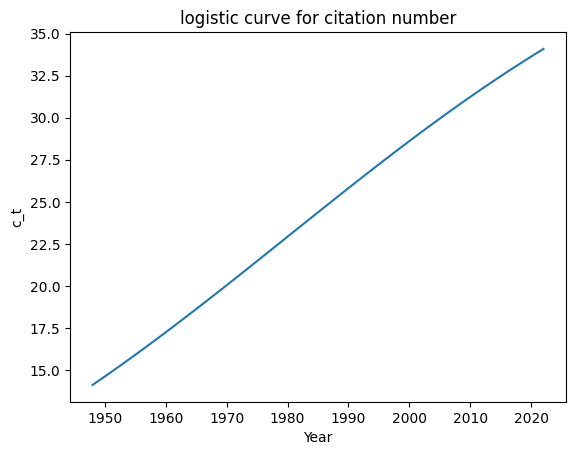

In [72]:
plt.plot(df.year,df.ct)
plt.title('logistic curve for citation number')
plt.xlabel('Year')
plt.ylabel('c_t')
plt.show()

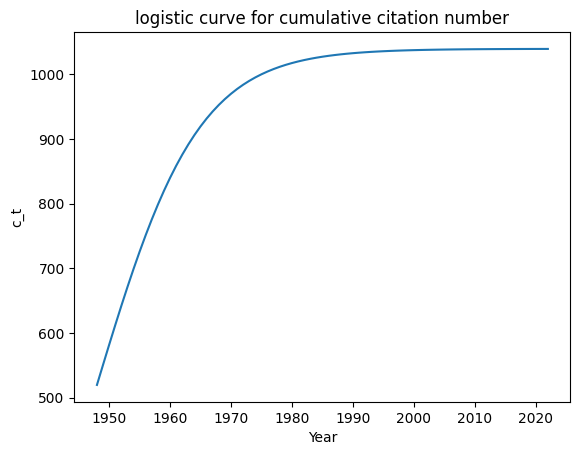

In [73]:
plt.plot(df.year,df.ct_cu)
plt.title('logistic curve for cumulative citation number')
plt.xlabel('Year')
plt.ylabel('c_t')
plt.show()

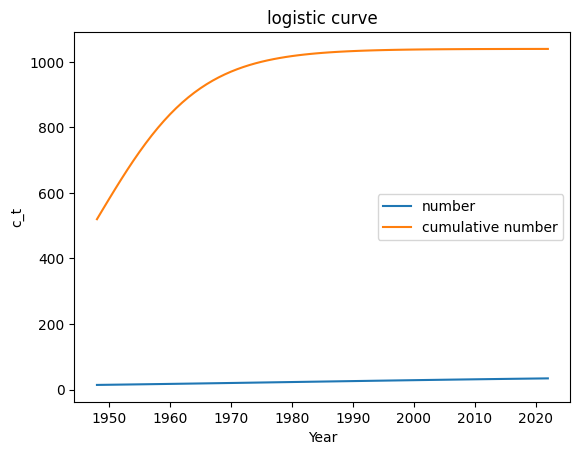

In [74]:
plt.plot(df.year,df.ct)
plt.plot(df.year,df.ct_cu)
plt.title('logistic curve')
plt.xlabel('Year')
plt.ylabel('c_t')
plt.legend(['number','cumulative number'])
plt.show()

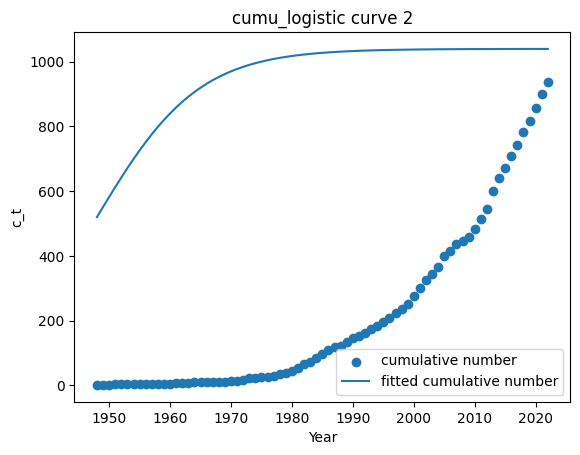

In [75]:
plt.scatter(df.year,df.cumu_number)
plt.plot(df.year,df.ct_cu)
plt.title('cumu_logistic curve 2')
plt.xlabel('Year')
plt.ylabel('c_t')
plt.legend(['cumulative number','fitted cumulative number'])
plt.show()

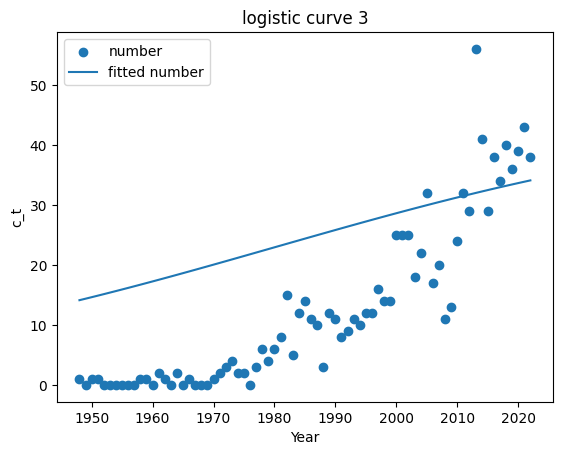

In [76]:
plt.scatter(df.year,df.number)
plt.plot(df.year,df.ct)
plt.title('logistic curve 3')
plt.xlabel('Year')
plt.ylabel('c_t')
plt.legend(['number','fitted number'])
plt.show()

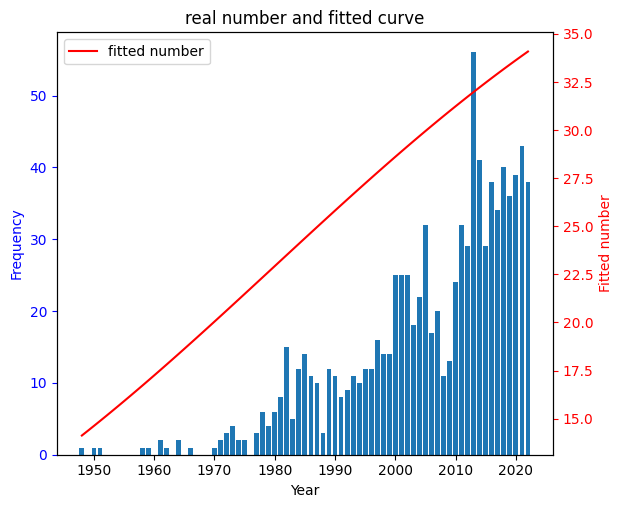

In [77]:
fig, ax1 = plt.subplots()
ax1.bar(df.year, df.number)
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency', color='b')
ax1.tick_params('y', colors='b')


plt.subplots_adjust(bottom=0)

ax2 = ax1.twinx()
ax2.plot(df.year, df.ct, color='r')
ax2.set_ylabel('Fitted number', color='r')
ax2.tick_params('y', colors='r')

plt.legend(['fitted number',''])
plt.title('real number and fitted curve')
plt.show()

The logistics curve encounters some problem, maybe because the line fitted to the proportional growth rate has slope approximately 0.

## use polynomial regression to fit

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     247.5
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           5.41e-33
Time:                        22:44:25   Log-Likelihood:                -225.03
No. Observations:                  75   AIC:                             456.1
Df Residuals:                      72   BIC:                             463.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0292      0.004      7.105      0.0

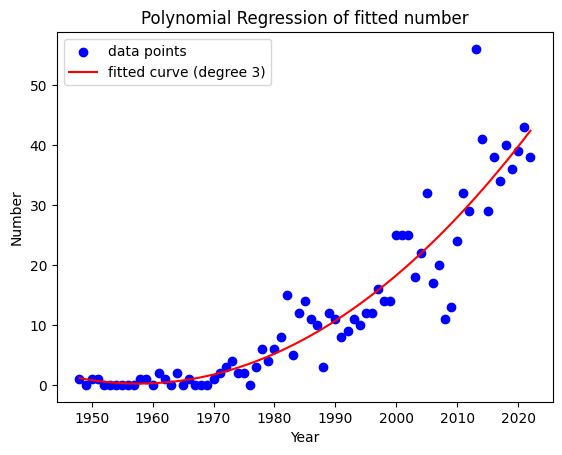

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = df.year.values.reshape(-1, 1)
y = df.number.values

# Create polynomial features
degree = 3  # Change degree as needed for higher dimensions
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

X_poly_with_constant = sm.add_constant(X_poly)

sm_model = sm.OLS(y, X_poly_with_constant).fit()
y_pred = sm_model.predict(X_poly_with_constant)

print(sm_model.summary())

# Visualize the results
plt.scatter(X, y, color='blue', label='data points')
plt.plot(X, y_pred, color='red', label=f'fitted curve (degree {degree})')
plt.title('Polynomial Regression of fitted number')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3288.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.76e-71
Time:                        22:44:25   Log-Likelihood:                -354.90
No. Observations:                  75   AIC:                             715.8
Df Residuals:                      72   BIC:                             722.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8038      0.023     34.670      0.0

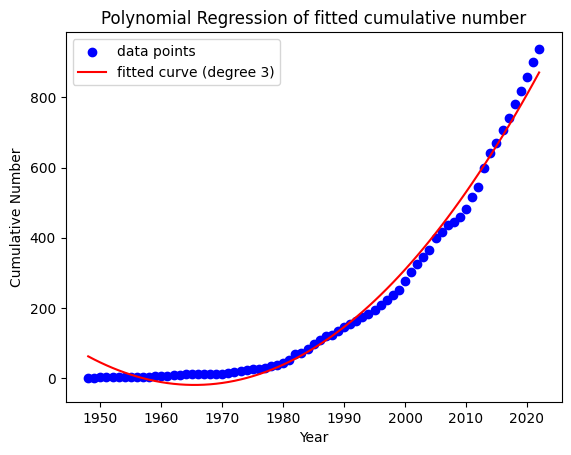

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = df.year.values.reshape(-1, 1)
y = df.cumu_number.values

# Create polynomial features
degree = 3  # Change degree as needed for higher dimensions
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

X_poly_with_constant = sm.add_constant(X_poly)

sm_model = sm.OLS(y, X_poly_with_constant).fit()
y_pred = sm_model.predict(X_poly_with_constant)

print(sm_model.summary())

# Visualize the results
plt.scatter(X, y, color='blue', label='data points')
plt.plot(X, y_pred, color='red', label=f'fitted curve (degree {degree})')
plt.title('Polynomial Regression of fitted cumulative number')
plt.xlabel('Year')
plt.ylabel('Cumulative Number')
plt.legend()
plt.show()
